<a href="https://colab.research.google.com/github/nexaim/eng_Braille_korean/blob/colab/Braille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Braille Converter!
https://hidden-loca.tistory.com/

영문 점자 번역 실습 노트 입니다. 질문 사항 있으시면 블로그 관련 게시물 및 댓글 남겨주시거나, 메일 보내주세요. 

nexaim95@gmail.com

이 노트는 colab 무료 GPU 런타임으로 확인 되었습니다.

## 1. 환경확인/설정


다음 셀을 실행하여 GPU 런타임이 맞는지 확인 합니다.

예시)
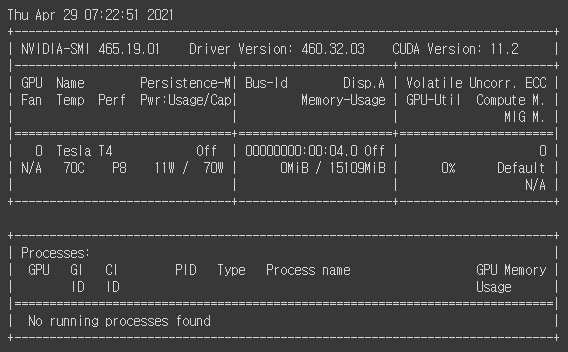

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



파이썬 버전확인

In [ ]:
import sys
print(sys.version)

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


텐서플로와 케라스 import

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

print(tf.__version__)


2.4.1


data를 불러 옵니다.

https://bit.ly/3aQkYwG

혹은 

https://hidden-loca.tistory.com/9?category=909779

zip파일 다운받은 후 좌측 파일 탭, 상단 세션저장소에 업로드.
이후 아래 셀을 실행하여 압축을 해제해 줍니다.


In [ ]:
!mkdir ex && cd ex && unzip ../ex.zip
!cd ..

Archive:  ../ex.zip
  inflating: a.png                   
  inflating: b.png                   
  inflating: c.png                   
  inflating: d.png                   
  inflating: e.png                   
  inflating: f.png                   
  inflating: g.png                   
  inflating: h.png                   
  inflating: i.png                   
  inflating: j.png                   
  inflating: k.png                   
  inflating: l.png                   
  inflating: m.png                   
  inflating: n.png                   
  inflating: o.png                   
  inflating: p.png                   
  inflating: q.png                   
  inflating: r.png                   
  inflating: s.png                   
  inflating: t.png                   
  inflating: u.png                   
  inflating: v.png                   
  inflating: w.png                   
  inflating: x.png                   
  inflating: y.png                   
  inflating: z.png            

## 2. 이미지 부풀리기, 데이터 준비.

학습에 사용될 이미지를 준비합니다. 

대부분의 경우 미리 준비된 이미지를 사용하지만, 잘 만들어진 이미지는 찾기 어렵습니다. 

kaggle에 올려진 이미지들 역시 대부분이 소수의 이미지만을 가지고 부풀려진 경우가 많습니다.

In [ ]:
import os

In [ ]:
os.chdir("/content/ex")
path  = os.getcwd()
dir = os.listdir()
print(path)
print(dir)
# zz == blink, 공백이며 순서를 z 다음으로 오도록 하였습니다.

/content/ex
['o.png', 'm.png', 'g.png', 'l.png', 'f.png', 'u.png', 'y.png', 'zz.png', 't.png', 'j.png', 'k.png', 'c.png', 's.png', 'n.png', 'p.png', 'h.png', 'i.png', 'q.png', 'w.png', 'e.png', 'b.png', 'x.png', 'z.png', 'a.png', 'r.png', 'd.png', 'v.png']


dir의 경우 추후 predict 결과를 정리할 때 재사용 됩니다. 

이미지 데이터를 부풀립니다.

Keras ImageDataGenerator를 이용하며 자세한 설명은 [케라스문서](https://keras.io/api/preprocessing/image/#imagedatagenerator-class), [블로그](https://hidden-loca.tistory.com/18)를 참고해 주세요.

In [ ]:
def createFolder(directory):
      if not os.path.exists(directory):
          os.makedirs(directory)

createFolder('../data')

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.01,
        fill_mode='constant',
        cval=255
        )

def all_char_gen():
    for j in dir:
        alpha = j.split('.')[0] #파일 에서 확장자만 제거합니다.
        createFolder('../data/'+alpha)
        # print(path +'/' +j)
        img = load_img(path +'/'+j)  # PIL 이미지
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        if j == 'zz.png':
          #흰 이미지가 들어올 경우 검은색으로 복사됩니다. 따로 복사합니다.
          import shutil
          for _ in range(10):
            print(_,j,'../data/'+alpha)
            shutil.copy(j,'../data/'+alpha+'/'+alpha+str(_)+'.jpg')
        else:  
          i = 0
          for batch in datagen.flow(x, batch_size=1,
                                    save_to_dir='../data/'+alpha, save_prefix=alpha, save_format='jpg'):
              i += 1
              if i > 20:
                  break  # 이미지 20장을 생성하고 마칩니다

all_char_gen()

0 zz.png ../data/zz
1 zz.png ../data/zz
2 zz.png ../data/zz
3 zz.png ../data/zz
4 zz.png ../data/zz
5 zz.png ../data/zz
6 zz.png ../data/zz
7 zz.png ../data/zz
8 zz.png ../data/zz
9 zz.png ../data/zz


데이터를 부풀린후 generator에 넣어 학습 준비를 마칩니다.

In [ ]:
os.chdir("/content")
path  = os.getcwd()
print(path)

def data_ready(size):
    images_dir = './data'

    datagen = ImageDataGenerator(rotation_range=10,
                                 shear_range=5,
                                 validation_split=0.1,
                                 ) #20%를 검증모델로 사용.

    train_generator = datagen.flow_from_directory(images_dir,
                                                  target_size=(size,size),
                                                  subset='training')

    val_generator = datagen.flow_from_directory(images_dir,
                                                target_size=(size,size),
                                                subset='validation')

    return train_generator, val_generator

/content


## 3. 모델 빌드

모델을 만들어 저장합니다.

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [ ]:
def Make_model(train,val, class_count, size = 28):

    K.clear_session()

    model_ckpt = ModelCheckpoint('ckpt.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=20,verbose=2)

    entry = L.Input(shape=(size,size,3))
    x = L.SeparableConv2D(64,(3,3),activation='relu',padding ='same')(entry)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(128,(3,3),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(256,(2,2),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(256)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(class_count,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit(train,validation_data=val,epochs=999,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=1)
    return history

###3.1 모델을 불러오기, 정확도 확인




In [ ]:
def load_model():
    from keras.models import load_model
    model = load_model('ckpt.h5')
    return model

def acc_chk(model, val):
    acc = model.evaluate_generator(val)[1]
    print('model accuracy: {}'.format(round(acc,4)))

##4. 학습 시작

이미지를 불러옵니다. data_ready에 사이즈를 넘겨 줍니다.

In [ ]:
img_size = 28
train_generator, val_generator = data_ready(img_size)

Found 502 images belonging to 27 classes.
Found 53 images belonging to 27 classes.


학습을 시작합니다. 

train, valid, class_size, img_size를 전달해줍니다.

In [ ]:
hist = Make_model(train_generator,val_generator,len(dir),img_size)

Epoch 1/999
16/16 [==============================] - 3s 116ms/step - loss: 3.3769 - accuracy: 0.0482 - val_loss: 3.3047 - val_accuracy: 0.0755
Epoch 2/999
16/16 [==============================] - 1s 78ms/step - loss: 3.3062 - accuracy: 0.0554 - val_loss: 3.2634 - val_accuracy: 0.0755
Epoch 3/999
16/16 [==============================] - 1s 79ms/step - loss: 3.2505 - accuracy: 0.0930 - val_loss: 3.1403 - val_accuracy: 0.0755
Epoch 4/999
16/16 [==============================] - 1s 80ms/step - loss: 3.0630 - accuracy: 0.1159 - val_loss: 2.7173 - val_accuracy: 0.2264
Epoch 5/999
16/16 [==============================] - 1s 84ms/step - loss: 2.5833 - accuracy: 0.2682 - val_loss: 2.0619 - val_accuracy: 0.3774
Epoch 6/999
16/16 [==============================] - 1s 79ms/step - loss: 1.8971 - accuracy: 0.3669 - val_loss: 1.2096 - val_accuracy: 0.6226
Epoch 7/999
16/16 [==============================] - 1s 82ms/step - loss: 1.1444 - accuracy: 0.6319 - val_loss: 0.8596 - val_accuracy: 0.6981
Epoch

return되는 hist를 통해 학습 과정을 시각화 할 수 있습니다.

In [ ]:
def print_acc_loss(history):
    # 평가 결과 도식화
    import matplotlib.pyplot as plt
    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

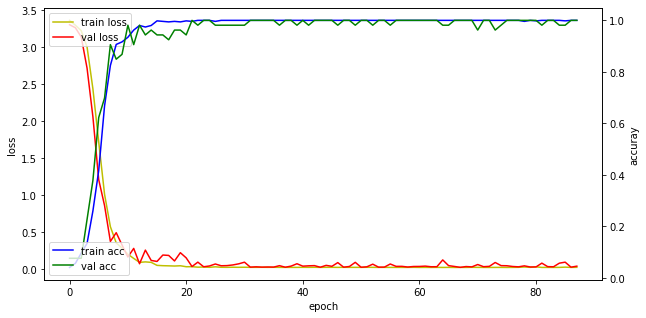

In [ ]:
print_acc_loss(hist)

###4.1 학습 검증

call back 에 의해서 학습된 모델은 자동으로 저장됩니다. 

혹은 모델을 직접 저장해서 사용할 수도 있습니다. 
모델은 load_model로 불러와 사용할 수 있습니다.

In [ ]:
def load_model(model_name):
    from tensorflow.keras.models import load_model
    model = load_model(model_name)
    return model

def acc_chk(model, val):
    acc = model.evaluate(val)[1]
    print('model accuracy: {}'.format(round(acc,4)))

In [ ]:
model = load_model('ckpt.h5')
acc_chk(model, val_generator)

2/2 [==============================] - 0s 27ms/step - loss: 0.0237 - accuracy: 1.0000
model accuracy: 1.0


##5. 추론

한장의 이미지를 불러와 모델에 넣어 추론합니다.

모든 과정은 numpy와 함께 합니다.

In [ ]:
import PIL.Image as Img
import numpy as np

def get_test_img(path):
  img = Img.open(path).convert('RGB')
  img = img.resize((28,28))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  return x



In [ ]:
# 이미지를 바꿔 가며 index의 변화를 확인해 보세요.
test_image = get_test_img('/content/ex/a.png')
result = model.predict(test_image)

max = np.max(result)
index = np.where(result == max)

print(max, *index[1])

0.9992459 0


dir list에서 확장자를 제거하여 label로 사용하도록 하겠습니다.

In [ ]:
tmp = []
for file in dir:
  tmp.append(file.split('.')[0])
dir = tmp
dir.sort()
del dir[dir.index('zz')]
dir.append(' ')
print(dir)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


In [ ]:
def decode_predict(result,lables):
  max = np.max(result)
  index = np.where(result == max)
  # print(index[1])
  # print(tags[index[1][0]])

  return lables[index[1][0]]


In [ ]:
test_image = get_test_img('/content/ex/zz.png')
result = model.predict(test_image)
decoded = decode_predict(result, lables=dir)

print(f'predicted! : {decoded}')

predicted! :  
